In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from detection import *
from emission import *
from tqdm import tqdm
import pandas as pd


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
E = np.linspace(1e-3, 100, 1000000) # Neutrino detection energy
distance = 10
model = 'LS220-27.0'

In [5]:
y_e_d = detection_spectra(E, model, flavor = 'nu_e', detector = 'DUNE', hierarchy = 'normal', distance = distance)
y_ebar_d = detection_spectra(E, model, flavor = 'nubar_e', detector = 'DUNE', hierarchy = 'normal', distance = distance)
y_x_d = detection_spectra(E, model, flavor = 'nu_x', detector = 'DUNE', hierarchy = 'normal', distance = distance)

y_e_j = detection_spectra(E, model, flavor = 'nu_e', detector = 'JUNO', hierarchy = 'normal', distance = distance)
y_ebar_j = detection_spectra(E, model, flavor = 'nubar_e', detector = 'JUNO', hierarchy = 'normal', distance = distance)
y_x_j = detection_spectra(E, model, flavor = 'nu_x', detector = 'JUNO', hierarchy = 'normal', distance = distance)

y_e = detection_spectra(E, model, flavor = 'nu_e', detector = 'super-k', hierarchy = 'normal', distance = distance, get_directions = False)
y_ebar = detection_spectra(E, model, flavor = 'nubar_e', detector = 'super-k', hierarchy = 'normal', distance = distance, get_directions = False)
y_x = detection_spectra(E, model, flavor = 'nu_x', detector = 'super-k', hierarchy = 'normal', distance = distance, get_directions = False)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt: 

In [ ]:
cmap = 'inferno'
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(E, (produced_spectrum(E, 'nu_e', model)+produced_spectrum(E, 'nubar_e', model)+produced_spectrum(E, 'nu_x', model))/simps((produced_spectrum(E, 'nu_e', model)+produced_spectrum(E, 'nubar_e', model)+produced_spectrum(E, 'nu_x', model)), E),
         color = 'black', lw = 2, label = r'Produced spectrum')
plt.plot(E, (y_e+y_ebar+y_x)/simps(y_e+y_ebar+y_x, E), ls = '--', color = 'purple', lw = 2,
        label = 'Detection spectrum (Super-Kamiokande)')
plt.plot(E, (y_e_d+y_ebar_d+y_x_d)/simps(y_e_d+y_ebar_d+y_x_d, E), ls = '--', color = 'crimson', lw = 2,
        label = 'Detection spectrum (DUNE)')
# plt.plot(E, (y_e_j+y_ebar_j+y_x_j)/simps(y_e_j+y_ebar_j+y_x_j, E), ls = '--', color = 'teal', lw = 2,
#         label = 'Detection spectrum (JUNO)')

plt.legend(title = 'Neutrino Spectra', fontsize = 16, ncol = 1, loc = 'upper right')
plt.title('Neutrino spectra produced and detected on Earth - 27 M$_\odot$ CCSS', fontsize = 24, pad = 24)
plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
plt.ylabel('Normalized time-integrated flux', fontsize = 20)
plt.xlim(0, 60)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.yaxis.offsetText.set_fontsize(12)
lgd = ax.get_legend()
lgd.get_title().set_fontsize(18)
fig.patch.set_alpha(1)
plt.ylim(0)
plt.tight_layout()
fig.text(0.5, 0.89, 'Normal mass hierarchy', fontsize = 20, ha = 'center')
# plt.savefig('Plots/Production_and_detection_spectra_total_en.png', dpi = 300, bbox_inches = 'tight')
plt.show()

**Resolution of DUNE** $\approx 0.2$, independent of neutrino energy

Abi, B., Acciarri, R., Acero, M. A., Adamov, G., Adams, D., Adinolfi, M., ... & Childress, S. (2020). Deep underground neutrino experiment (dune), far detector technical design report, volume ii: Dune physics. arXiv preprint arXiv:2002.03005.

In [ ]:
detector = 'DUNE'
ref = energy_sampler(E, model, detector, 'normal', distance, get_directions = False,
                     print_expected = False)
# ref_invert = energy_sampler(E, model, detector, 'inverted', distance, get_directions = False,
#                            print_expected = False)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
cmap = 'inferno'
if detector == 'super-k' or detector == 'Hyper-k':
    bin_width = np.round(2*0.5*np.sqrt(50),0)
elif detector == 'DUNE':
    bin_width = np.round(2*(0.11*np.sqrt(50) + 0.02*50),0)
elif detector == 'JUNO':
    bin_width = 1

print(f'Bin width: {bin_width:.2f}')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].hist(ref['Total'], bins = [bin_width*i for i in range(80)], histtype = 'step', color = 'teal',
        lw = 2)
# ax[0].plot(E, y_e+y_ebar+y_x, ls = '--', color = 'purple', lw = 1.5)
ax[0].plot([80, 100], [0,10], label = r'Total events: '+f"{len(ref['Total'])}", color = 'teal', lw = 2)
ax[0].hist(ref['nu_e'], bins = [bin_width*i for i in range(80)], histtype = 'step',
           color = sns.color_palette(cmap, 7)[3],
        lw = 2)
ax[0].plot([80, 100], [0,10], label = r'$\nu_e$: '+f"{len(ref['nu_e'])}", color = sns.color_palette(cmap, 7)[3], lw = 2)
ax[0].hist(ref['nubar_e'], bins = [bin_width*i for i in range(80)], histtype = 'step',
           color = sns.color_palette(cmap, 7)[0],
        lw = 2)
ax[0].plot([80, 100], [0,10], label = r'$\overline{\nu}_e$: '+f"{len(ref['nubar_e'])}", color = sns.color_palette(cmap, 7)[0], lw = 2)
ax[0].hist(ref['nu_x'], bins = [bin_width*i for i in range(80)], histtype = 'step',
           color = sns.color_palette(cmap, 7)[5],
        lw = 2)
ax[0].plot([80, 100], [0,10], label = r'$\nu_x$: '+f"{len(ref['nu_x'])}", color = sns.color_palette(cmap, 7)[5], lw = 2)
lgd = ax[0].legend(title = 'Neutrino type', loc = 'upper right', fontsize = 18, ncol = 1)
title = lgd.get_title()
title.set_fontsize(18)
ax[0].set_xlabel('Neutrino energy [MeV]', fontsize = 20)
ax[0].set_ylabel('Events per bin', fontsize = 20)
ax[0].set_title(f'Normal mass hierarchy', fontsize = 22)
ax[0].set_xlim(0, 70)
ax[0].set_ylim(0, 25000)
ax[0].set_yticklabels(ax[0].get_yticks().astype(int), fontsize = 14)
ax[0].set_xticklabels(ax[0].get_xticks().astype(int), fontsize = 14)

ax[1].hist(ref_invert['Total'], bins = [bin_width*i for i in range(80)], histtype = 'step', color = 'teal',
        lw = 2)
ax[1].plot([80, 100], [0,10], label = r'Total events: {}'.format(len(ref_invert['Total'])),
           color = 'teal', lw = 2)
ax[1].hist(ref_invert['nu_e'], bins = [bin_width*i for i in range(80)], histtype = 'step',
           color = sns.color_palette(cmap, 7)[3],
        lw = 2)
ax[1].plot([80, 100], [0,10], label = r'$\nu_e$: {}'.format(len(ref_invert['nu_e'])),
           color = sns.color_palette(cmap, 7)[3], lw = 2)
ax[1].hist(ref_invert['nubar_e'], bins = [bin_width*i for i in range(80)], histtype = 'step',
           color = sns.color_palette(cmap, 7)[0],
        lw = 2)
ax[1].plot([80, 100], [0,10], label = r'$\overline{\nu}_e$: '+f"{len(ref_invert['nubar_e'])}",
           color = sns.color_palette(cmap, 7)[0], lw = 2)
ax[1].hist(ref_invert['nu_x'], bins = [bin_width*i for i in range(80)], histtype = 'step',
           color = sns.color_palette(cmap, 7)[5],
        lw = 2)
ax[1].plot([80, 100], [0,10], label = r'$\nu_x$ '+f"{len(ref_invert['nu_x'])}",
           color = sns.color_palette(cmap, 7)[5], lw = 2)
lgd = ax[1].legend(title = 'Neutrino type', loc = 'upper right', fontsize = 18, ncol = 1)
title = lgd.get_title()
title.set_fontsize(18)
ax[1].set_xlabel('Neutrino energy [MeV]', fontsize = 20)
ax[1].set_ylabel('Events per bin', fontsize = 20)
ax[1].set_title(f'Inverted mass hierarchy', fontsize = 22)
ax[1].set_xlim(0, 70)
ax[1].set_ylim(0, 25000)
ax[1].set_yticklabels(ax[1].get_yticks().astype(int), fontsize = 14)
ax[1].set_xticklabels(ax[1].get_xticks().astype(int), fontsize = 14)

if detector == 'super-k':
    fig.text(0.5, 0.95, f'Detection spectrum for a 27$_\odot$ CCSN: Super-K | {distance} Kpc',
         fontsize = 26, ha = 'center')
elif detector == 'Hyper-k':
    fig.text(0.5, 0.95, f'Detection spectrum for a 27$_\odot$ CCSN: Hyper-K | {distance} Kpc',
         fontsize = 26, ha = 'center')
else:
    fig.text(0.5, 0.95, f'Detection spectrum for a 27$_\odot$ CCSN: {detector} | {distance} Kpc',
             fontsize = 26, ha = 'center')
fig.patch.set_alpha(0)
for ax in fig.axes:
    ax.patch.set_alpha(0.5)
# plt.savefig(f'Plots/detection_spectrum_{detector}_{distance}_kpc_en.svg',
#             bbox_inches = 'tight', dpi = 300)
# plt.savefig(f'Plots/detection_spectrum_{detector}_{distance}_kpc_en.png',
#             bbox_inches = 'tight', dpi = 300)
plt.show()

In [94]:
detectors = ['super-k', 'DUNE', 'JUNO', 'Hyper-k']

for k in range(4):
    detector = detectors[k]
    
    results = {}
    distances = []
    means_no = []
    means_io = []
    std_no = []
    std_io = []
    for i in tqdm(range(50)):
        if i == 0:
            distance = 0.1
        else:
            distance = 1 + 2*i
        tot_no = []
        tot_io = []
        for j in range(30):
            ref = energy_sampler(E, model, detector, 'normal', distance, nadir = 0, print_expected=False, only_total_events=True)
            ref_invert = energy_sampler(E, model, detector, 'inverted', distance, nadir = 0, print_expected=False, only_total_events=True)
            tot_no.append(ref['Total'])
            tot_io.append(ref_invert['Total'])
        distances.append(distance)
        means_no.append(np.mean(tot_no))
        means_io.append(np.mean(tot_io))
        std_no.append(np.std(tot_no))
        std_io.append(np.std(tot_io))
        
    distances = np.array(distances)
    means_no = np.array(means_no)
    means_io = np.array(means_io)
    std_no = np.array(std_no)
    std_io = np.array(std_io)
    
    results['Distances'] = distances
    results['Mean N normal'] = means_no
    results['Mean N inverted'] = means_io
    results['SD N normal'] = std_no
    results['SD N inverted'] = std_io
    
    pd.DataFrame(results).to_csv(f'Total_events_detected_{detector}.csv')

100%|██████████| 50/50 [2:38:52<00:00, 190.65s/it]  


In [95]:
df = pd.read_csv('Total_events_detected_Super-k.csv')

In [100]:
df.head()

,Unnamed: 0,Distances,Mean N normal,Mean N inverted,SD N normal,SD N inverted
0,0,0.1,6.044801e+08,6.330828e+08,22285.739927,24894.015687
1,1,3.0,6.715010e+05,7.035937e+05,911.454789,635.464184
2,2,5.0,2.417807e+05,2.531294e+05,540.198293,559.195761
3,3,7.0,1.233551e+05,1.293376e+05,404.042072,331.620534
4,4,9.0,7.462117e+04,7.815153e+04,246.650912,259.054014


\begin{align}
N_\nu \propto \frac{1}{D^2}
\end{align}

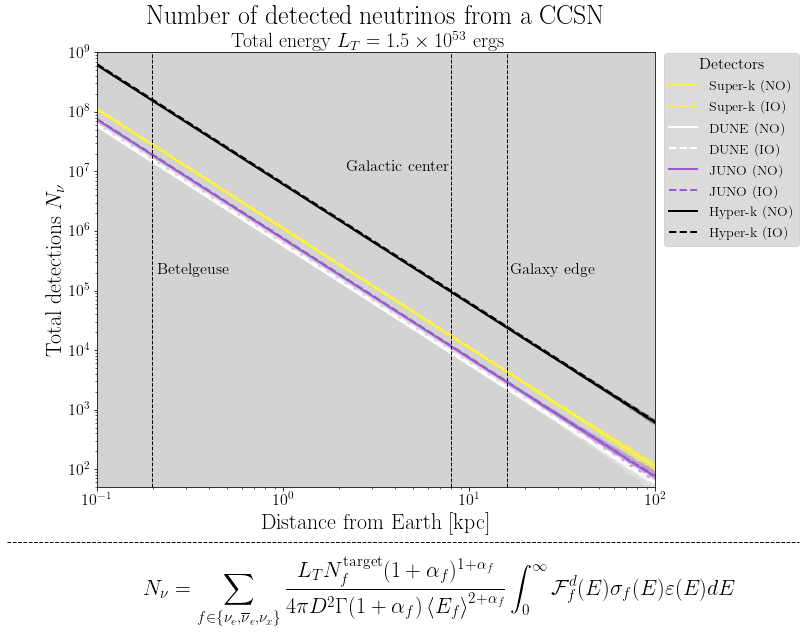

In [130]:
fig, ax = plt.subplots(figsize=(10,8))
detectors = ['Super-k', 'DUNE', 'JUNO', 'Hyper-k']
colors = ['#fff433','#ffffff','#9b59d0','#000000']
ymin = 50
ymax = 1e9

for i in range(4):
    df = pd.read_csv(f'Total_events_detected_{detectors[i]}.csv')
    plt.plot(df['Distances'], df['Mean N normal'], label = f'{detectors[i]} (NO)',
             lw = 2, color = colors[i])
    plt.plot(df['Distances'], df['Mean N inverted'], label = f'{detectors[i]} (IO)',
             lw = 2, ls = '--', color = colors[i])
    plt.fill_between(df['Distances'], df['Mean N normal']-2*df['SD N normal'],
                     df['Mean N normal']+2*df['SD N normal'], alpha = 0.2,
                    color = colors[i])
    plt.fill_between(df['Distances'], df['Mean N inverted']-2*df['SD N inverted'],
                     df['Mean N inverted']+2*df['SD N inverted'], alpha = 0.2,
                    color = colors[i])

plt.yscale('log')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylim(ymin, ymax)
plt.xscale('log')
plt.xlim(0.1, 100)
lgd = plt.legend(bbox_to_anchor=(1.27,1.015), ncol = 1, title = 'Detectors', fontsize = 14)
plt.setp(lgd.get_title(), fontsize = 16)
frame = lgd.get_frame()
frame.set_facecolor('lightgrey')
plt.xlabel('Distance from Earth [kpc]', fontsize = 22)
plt.ylabel(r'Total detections $N_\nu$', fontsize = 22)
plt.title(r'Number of detected neutrinos from a CCSN', fontsize = 26, pad = 28)
# fig.text(0.5, 0.89, r'Total energy $L_T = 1.5 \times 10^{53}$ ergs', fontsize = 20, ha = 'center')
# fig.text(0.6, -0.06, r'$N_\nu = \displaystyle \sum_{f \in \{\nu_e, \overline{\nu}_e, \nu_x\}} \frac{L_T N_f^{\mathrm{target}} (1+\alpha_f)^{1+\alpha_f}}{4 \pi D^2 \Gamma(1+\alpha_f) \left \langle E_f \right \rangle^{2+\alpha_f}} \displaystyle \int_0^\infty \mathcal{F}_f^d(E) \sigma_f(E) \varepsilon(E) dE$', fontsize = 22,
#         ha = 'center')
plt.vlines(8, ymin, ymax, ls = '--', color = 'black', lw = 1)
plt.vlines(16, ymin, ymax, ls = '--', color = 'black', lw = 1)
plt.vlines(0.197, ymin, ymax, ls = '--', color = 'black', lw = 1)
plt.text(7.8, 1e7, 'Galactic center', fontsize = 16, ha = 'right')
plt.text(0.21, 2e5, 'Betelgeuse', fontsize = 16)
plt.text(16.5, 2e5, 'Galaxy edge', fontsize = 16)
# fig.add_artist(mpl.lines.Line2D([0, 1.1], [0.03, 0.03], color = 'black', lw = 1, ls = '--'))

fig.patch.set_alpha(1)
# fig.patch.set_color('grey')
for ax in fig.axes:
    ax.patch.set_color('lightgrey')
# plt.savefig('Plots/Detected_events.svg', dpi = 300, bbox_inches = 'tight')
# plt.savefig('Plots/Detected_events.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [31]:
test = df.loc[df['Distances'] == 9]

In [32]:
print(f"Upper limit of events: {int(test['Mean N inverted'].values[0]+2*test['SD N inverted'].values[0])}"
     "\n"
     f"Lower limit of events: {int(test['Mean N normal'].values[0]-2*test['SD N normal'].values[0])}")

Upper limit of events: 78660
Lower limit of events: 73996
